In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing

## 1. Data Loading

In [3]:
df = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/heart.csv?raw=true')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Examination

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.shape

(303, 14)

***CHecking NA Values***

In [6]:
df[df.isna().any(axis=1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output




No NA values in the data set

## 3. Examine attributes and target variables

Attributes: 'age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'] 

       
Target:'output'

***Data Types***: All numeric

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
X = df.drop(columns = ['output'], axis = 0)
y = df['output']

In [10]:
X.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [11]:
y.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

***Variable Distributions***:

- sex, cp, fbs, restecg, exng, slp and caa are not normally distributed
- age, thalachh, trtbps, chol ~ N
    - thalachh is left skewed
    - chol is right skewed
    - trtbps is slighlt right skewed
- oldpeak is extremely right skewed, not normal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

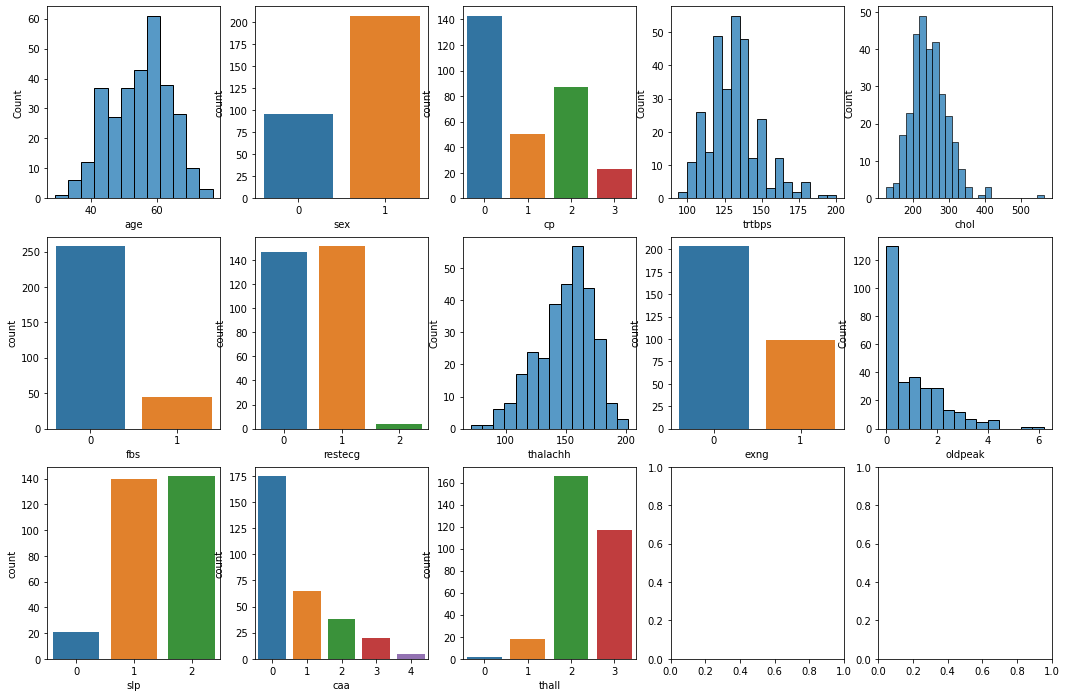

In [12]:
fig, axs = plt.subplots(3, 5, figsize = (18, 12))

for col, ax in zip(X.columns, axs.ravel()):
    if col not in ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']:
        sns.countplot(X[col], ax = ax)
    else:
        sns.histplot(X[col], ax = ax)
plt.show()

Target variable is not normally distributed. The counts of the possible values are almsot equal, so that is good.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


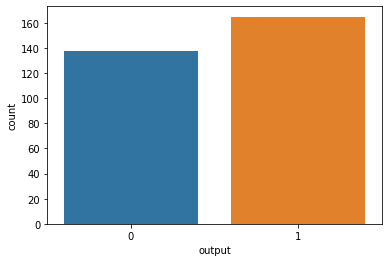

In [13]:
sns.countplot(y)

***Box Plots:***

- Predictors dont have too many outliers
- Target does not have any outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

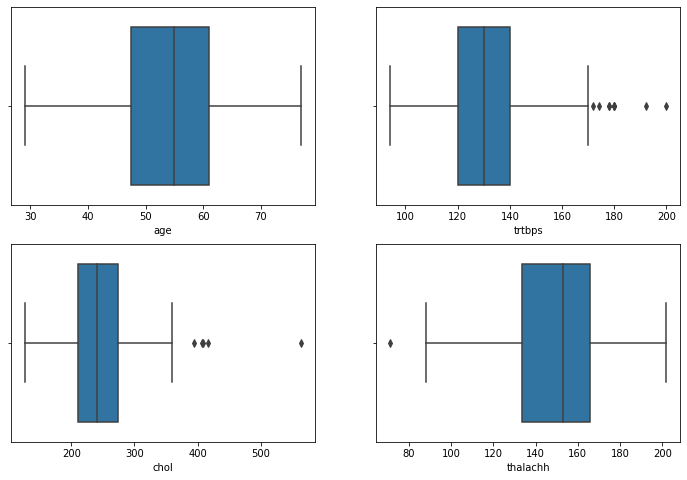

In [14]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

col_lis = [c for c in X.columns if c in ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]
for col, ax in zip(col_lis, axs.ravel()):
    sns.boxplot(X[col], ax = ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


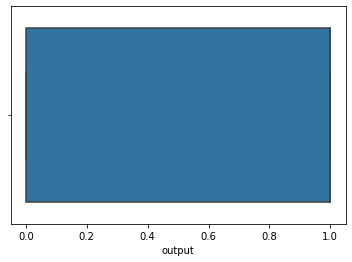

In [15]:
sns.boxplot(y)

***Remove Outliers:***
- We dicided to not remove outliers because they represent a very small prtion of the dataset
- When predicting such a rare condition such as heart attack, it is important to consider the outliers becuase many of the cases will be outliers.

## 5. Variable Correlation

***Correlation Matrix:***

In [16]:
mat = df.corr()
mat

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


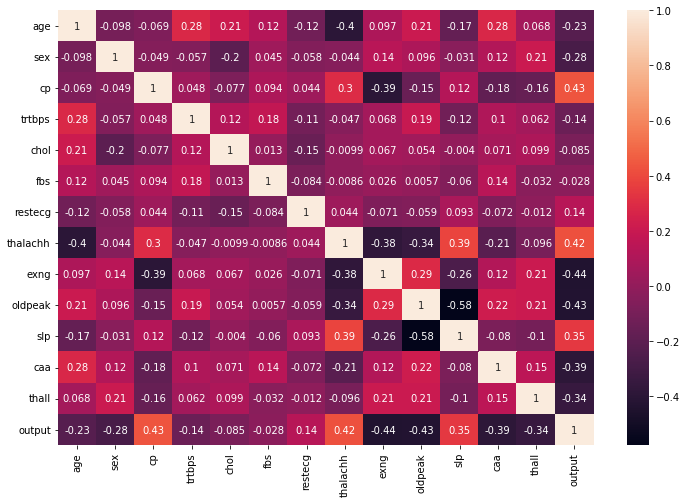

In [17]:
plt.figure(figsize = (12, 8))
sns.heatmap(mat, annot = True)

***Variable Colinearity***

In [18]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index = X.columns)

age         38.998305
sex          3.523211
cp           2.414403
trtbps      58.557335
chol        26.267365
fbs          1.268205
restecg      2.058206
thalachh    42.742178
exng         2.022527
oldpeak      3.062890
slp         10.072734
caa          1.808925
thall       17.165303
dtype: float64

In [19]:
X_trimmed = X[['age', 'trtbps', 'chol', 'thalachh']]
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

age         35.989893
trtbps      52.651454
chol        24.170307
thalachh    26.542306
dtype: float64

In [20]:
X_trimmed = X.drop(columns = ['age'], axis = 0)
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

sex          3.523210
cp           2.409683
trtbps      42.943607
chol        23.632837
fbs          1.267435
restecg      2.053256
thalachh    42.561820
exng         2.022140
oldpeak      3.043370
slp         10.016331
caa          1.750197
thall       16.936385
dtype: float64

In [21]:
X_trimmed = X.drop(columns = ['trtbps'], axis = 0)
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

age         28.599796
sex          3.522376
cp           2.403644
chol        25.923434
fbs          1.250256
restecg      2.058206
thalachh    34.026519
exng         1.990878
oldpeak      2.973430
slp         10.067190
caa          1.808102
thall       17.005949
dtype: float64

In [22]:
X_trimmed = X.drop(columns = ['chol'], axis = 0)
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

age         35.086906
sex          3.398942
cp           2.405997
trtbps      57.790616
fbs          1.267359
restecg      2.033087
thalachh    39.478999
exng         2.004457
oldpeak      3.057865
slp         10.038032
caa          1.808878
thall       16.808992
dtype: float64

In [23]:
X_trimmed = X.drop(columns = ['thalachh'], axis = 0)
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

age        38.833744
sex         3.443400
cp          2.332817
trtbps     46.616769
chol       24.261966
fbs         1.267760
restecg     2.029602
exng        1.961520
oldpeak     3.059687
slp         8.800728
caa         1.776016
thall      16.631071
dtype: float64

In [24]:
X_trimmed = X.drop(columns = ['trtbps', 'chol'], axis = 0)
pd.Series([variance_inflation_factor(X_trimmed.values, i) 
               for i in range(X_trimmed.shape[1])], 
              index = X_trimmed.columns)

age         23.019666
sex          3.398809
cp           2.397188
fbs          1.250064
restecg      2.032766
thalachh    29.367749
exng         1.966602
oldpeak      2.962235
slp         10.028738
caa          1.808089
thall       16.587541
dtype: float64

## 6. Important attributes:
- Remove chol:
    - High VIF score 
    - Low correlation
- Remove trtbps:
    - Extrenely high VIF
    - Relativley low correlation
- Removing these two variables significantly lowers the VIF scores of the other variables, indicating less colinearity

In [25]:
df.drop(columns = ['chol', 'trtbps'], axis = 0, inplace = True)
df.head()

,age,sex,cp,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,1,0,150,0,2.3,0,0,1,1
1,37,1,2,0,1,187,0,3.5,0,0,2,1
2,41,0,1,0,0,172,0,1.4,2,0,2,1
3,56,1,1,0,1,178,0,0.8,2,0,2,1
4,57,0,0,0,1,163,1,0.6,2,0,2,1


## 4. Standardize and normalize the attributes

We decided to not standardize because we are using tree based models. Standardized tree visualizations will show splits based on the standardized variables and will not depict the actual splitiing values related to the initial problem statement. Furthermore, the predictive value of the trees will not be effected by non-standardization.

## 7. Dummy Variables

In [28]:
[c for c in X.columns if c not in ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [29]:
df['sex'] = df['sex'].astype(str)
df['cp'] = df['cp'].astype(str)
df['fbs'] = df['fbs'].astype(str)
df['restecg'] = df['restecg'].astype(str)
df['exng'] = df['exng'].astype(str)
df['slp'] = df['slp'].astype(str)
df['caa'] = df['fbs'].astype(str)
df['thall'] = df['thall'].astype(str)

In [30]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,age,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,thall_1,thall_2,thall_3
0,63,150,2.3,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0
1,37,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,56,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,57,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [32]:
df.columns

Index(['age', 'thalachh', 'oldpeak', 'output', 'sex_1', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'exng_1', 'slp_1', 'slp_2', 'caa_1',
       'thall_1', 'thall_2', 'thall_3'],
      dtype='object')

In [33]:
X = df.drop(columns = ['output'], axis = 0)
y = df['output']

## 8. Train/Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

***Upload the train/test data to gitub to make collaboration easier***


In [36]:
X_train.to_csv('X_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_test.to_csv('y_test.csv', index = False)